<a href="https://colab.research.google.com/github/avocado145/PythonFinalProject/blob/main/ivan_ivanov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой части моего проекта реализуем карту, которая наглядно показывает "распространенность" ресторанов с наградой Мишлен в определенной стране. Для этого на интерактивной карте мира будем оценивать, сколько всего в каждой стране соответствующих мест.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
import plotly.express as px
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('michelin_my_maps.csv')

Обычная карта мира(ну, база...)

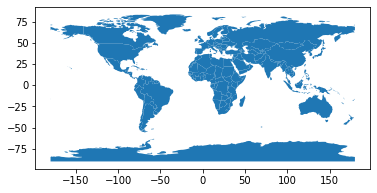

In [ ]:
world.plot()

In [ ]:
from shapely.geometry import Point

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
df.head()

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,4.940229e+11,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,4.980227e+09,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,4.930246e+11,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars


In [ ]:
Point()


In [ ]:
all_the_points = [Point(row['Longitude'], row['Latitude']) for _, row in df.iterrows()] #выводим все нужные нам точки-рестораны

In [ ]:
points_df = gpd.GeoDataFrame(df, geometry=all_the_points, crs="EPSG:4326")
points_df.head() 

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,geometry
0,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,225,225,EUR,"Creative, Modern Cuisine",10.789999,52.433172,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,http://www.restaurant-aqua.com,3 MICHELIN Stars,POINT (10.79000 52.43317)
1,The Table Kevin Fehling,"Shanghaiallee 15, Hamburg, 20457, Germany",Hamburg,230,230,EUR,Creative,10.002980,53.542623,4.940229e+11,https://guide.michelin.com/en/hamburg-region/h...,http://www.the-table-hamburg.de/,3 MICHELIN Stars,POINT (10.00298 53.54262)
2,Restaurant Überfahrt Christian Jürgens,"Überfahrtstraße 10, Rottach-Egern, 83700, Germany",Rottach-Egern,259,319,EUR,Creative,11.758229,47.696685,4.980227e+09,https://guide.michelin.com/en/bayern/rottach-e...,http://www.althoffcollection.com,3 MICHELIN Stars,POINT (11.75823 47.69668)
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,205,295,EUR,Creative,6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 MICHELIN Stars,POINT (6.38721 49.53517)
4,Rutz,"Chausseestraße 8, Berlin, 10115, Germany",Berlin,198,245,EUR,"Modern Cuisine, Creative",13.386087,52.528351,4.930246e+11,https://guide.michelin.com/en/berlin-region/be...,https://www.rutz-restaurant.de/,3 MICHELIN Stars,POINT (13.38609 52.52835)


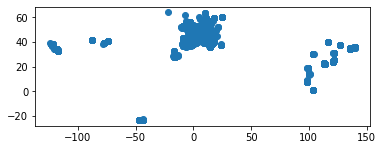

In [ ]:
points_df.plot() #это наши рестораны без карты мира

In [ ]:
%pip install pygeos
%pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
count_of_rests = world.sjoin(points_df, how='left')['iso_a3'].value_counts()
count_of_rests.head()

-99    1110
JPN     843
DEU     609
ITA     597
USA     539
Name: iso_a3, dtype: int64

Вот и та самая долгожданная карта мира, где правда показана не плотность населения, а плотность крутых ресторанов)))))) Чем ярче цвет - тем больше ресторанов в данной стране(легенда нам как раз-таки на это и указывает). Прикольно, что именно в Японии и Норвегии такие высокие показатели(а также выделяется Франция, но тут, кажется, все более-менее очевидно)

In [ ]:
fig, ax = plt.subplots(figsize=(150, 150))
world.set_index('iso_a3').assign(count_of_rests=count_of_rests).plot(column='count_of_rests', ax=ax, legend=True)